# Exploration of traffic data from lauttasaaren silta

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Data source: https://www.avoindata.fi/data/fi/dataset/liikennemaarat-helsingissa

The data is obtained from an automatic meassurement point at: https://www.google.fi/maps/place/60%C2%B009'44.6%22N+24%C2%B053'58.6%22E/@60.1623877,24.8974263,17z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d60.162385!4d24.899615?hl=en

Legend(in Finnish): ha=henkilöautot pa=pakettiautot ka=kuorma-autot ra=rekka-autot la=linja-autot mp=moottoripyörät rv=raitiovaunut

Laskenta on tehty tunneittain, paitsi ruuhka-aikoina (klo 6.00-9.00 ja 15.00-18.00) jaksotus on 15 minuuttia. Kellonajat ovat alkavia kellonaikoja. Laskentapisteiden poikkileikkaukset lasketaan suunnittain (suunta 1 on keskustaan, linjalla D D1-D13 länteen)

In [21]:
data = pd.read_csv('data/hki_liikennemaarat.csv', encoding='latin-1',delimiter=';')
data.head()

,piste,nimi,x_gk25,y_gk25,suunta,aika,vuosi,ha,pa,ka,ra,la,mp,rv,autot
0,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,0,2011,76,5,1,0,5,0,0,87
1,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,100,2011,65,5,1,0,4,0,0,75
2,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,200,2011,61,4,1,0,4,0,0,70
3,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,300,2011,52,4,1,0,3,0,0,60
4,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,400,2011,31,2,0,0,2,0,0,35


Remove data about trams and other measurement points.

In [51]:
laru = data[data.nimi == 'LAUTTASAAREN SILTA']
laru = laru.loc[:,['suunta','aika','vuosi','autot']]

Since the time series is at uneven intervals some reductions have to be made.

In [54]:
laru['tunti'] = (laru['aika'] / 100).apply(np.floor)
laru

,suunta,aika,vuosi,autot,tunti
0,1.0,0,2011,87,0.0
1,1.0,100,2011,75,1.0
2,1.0,200,2011,70,2.0
3,1.0,300,2011,60,3.0
4,1.0,400,2011,35,4.0
5,1.0,500,2011,87,5.0
6,1.0,600,2011,54,6.0
7,1.0,615,2011,60,6.0
8,1.0,630,2011,77,6.0
9,1.0,645,2011,96,6.0


In [114]:
yrl = laru.groupby(['vuosi','suunta','tunti']).sum()
yrl.reset_index(inplace=True)
yrl

,vuosi,suunta,tunti,aika,autot
0,2011,1.0,0.0,0,87
1,2011,1.0,1.0,100,75
2,2011,1.0,2.0,200,70
3,2011,1.0,3.0,300,60
4,2011,1.0,4.0,400,35
5,2011,1.0,5.0,500,87
6,2011,1.0,6.0,2490,287
7,2011,1.0,7.0,2890,405
8,2011,1.0,8.0,3290,484
9,2011,1.0,9.0,900,422


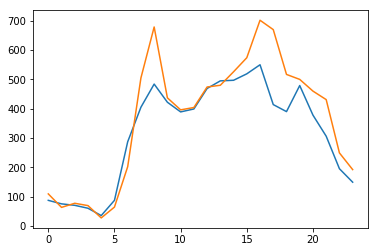

In [143]:

y_2011_1 = yrl[(yrl.vuosi == 2011) & (yrl.suunta == 1.0) ]
y_2011_2 = yrl[(yrl.vuosi == 2011) & (yrl.suunta == 2.0) ]

plt.plot(y_2011_1.tunti,y_2011_1.autot, label='Towards Helsinki')
plt.plot(y_2011_2.tunti,y_2011_2.autot,label='Away from Helsinki')

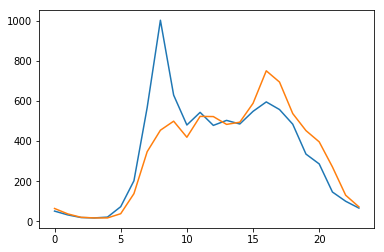

In [144]:
y_2012_1 = yrl[(yrl.vuosi == 2012) & (yrl.suunta == 1.0) ]
y_2012_2 = yrl[(yrl.vuosi == 2012) & (yrl.suunta == 2.0) ]

plt.plot(y_2012_1.tunti,y_2012_1.autot, label='Towards Helsinki')
plt.plot(y_2012_2.tunti,y_2012_2.autot,label='Away from Helsinki')

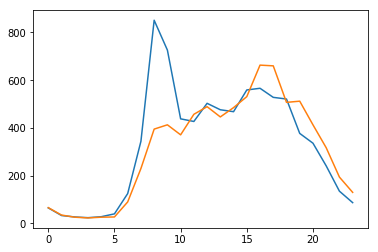

In [145]:
y_2013_1 = yrl[(yrl.vuosi == 2013) & (yrl.suunta == 1.0) ]
y_2013_2 = yrl[(yrl.vuosi == 2013) & (yrl.suunta == 2.0) ]

plt.plot(y_2013_1.tunti,y_2013_1.autot, label='Towards Helsinki')
plt.plot(y_2013_2.tunti,y_2013_2.autot,label='Away from Helsinki')

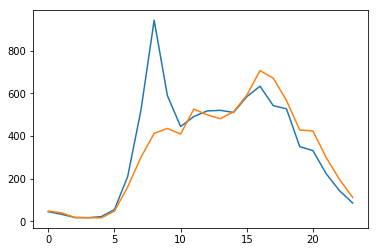

In [146]:
y_2014_1 = yrl[(yrl.vuosi == 2014) & (yrl.suunta == 1.0) ]
y_2014_2 = yrl[(yrl.vuosi == 2014) & (yrl.suunta == 2.0) ]

plt.plot(y_2014_1.tunti,y_2014_1.autot, label='Towards Helsinki')
plt.plot(y_2014_2.tunti,y_2014_2.autot,label='Away from Helsinki')

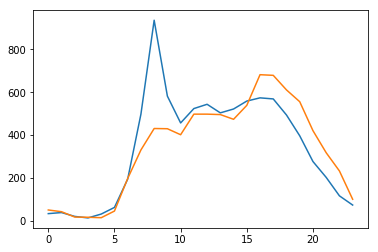

In [148]:
y_2015_1 = yrl[(yrl.vuosi == 2015) & (yrl.suunta == 1.0) ]
y_2015_2 = yrl[(yrl.vuosi == 2015) & (yrl.suunta == 2.0) ]

plt.plot(y_2015_1.tunti,y_2015_1.autot, label='Towards Helsinki')
plt.plot(y_2015_2.tunti,y_2015_2.autot,label='Away from Helsinki')

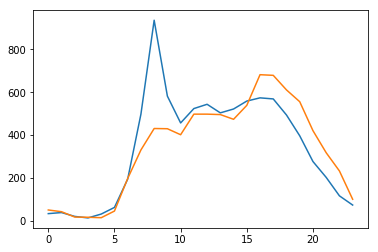

In [150]:
y_2016_1 = yrl[(yrl.vuosi == 2016) & (yrl.suunta == 1.0) ]
y_2016_2 = yrl[(yrl.vuosi == 2016) & (yrl.suunta == 2.0) ]

plt.plot(y_2016_1.tunti,y_2016_1.autot, label='Towards Helsinki')
plt.plot(y_2016_2.tunti,y_2016_2.autot,label='Away from Helsinki')